In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/glove6b/glove.6B.50d.txt
/kaggle/input/glove6b/glove.6B.200d.txt
/kaggle/input/glove6b/glove.6B.100d.txt
/kaggle/input/glove6b/glove.6B.300d.txt
/kaggle/input/amazon-fine-food-reviews/hashes.txt
/kaggle/input/amazon-fine-food-reviews/Reviews.csv
/kaggle/input/amazon-fine-food-reviews/database.sqlite


In [2]:
# To add a new cell, type '# %%'
# To add a new markdown cell, type '# %% [markdown]'
# %%
import re
from re import error

import numpy as np
import pandas as pd
import seaborn as sns

# %%
from bs4 import BeautifulSoup

# %%
from IPython.core.interactiveshell import InteractiveShell
from matplotlib import pyplot as plt
from nltk.corpus import stopwords

# %%
InteractiveShell.ast_node_interactivity = "all"


In [3]:
# %%
data = pd.read_csv("/kaggle/input/amazon-fine-food-reviews/Reviews.csv", keep_default_na=False, nrows=15000)


# %%
data.head()
data.shape

# %%
contraction_mapping = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'll": "he will",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I would",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "this's": "this is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "here's": "here is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have",
}

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


(15000, 10)

In [4]:
# %%
stop_words = set(stopwords.words("english"))


# %%
def text_cleaner(text, num):
    # Remove all HTML tags, quotes, punctuations, apostrophes
    clean_txt = BeautifulSoup(text, "lxml").text
    clean_txt = re.sub(r"\([^)]*\)", "", clean_txt)
    clean_txt = re.sub('"', "", clean_txt)
    clean_txt = " ".join(
        [
            contraction_mapping[t] if t in contraction_mapping else t
            for t in clean_txt.split(" ")
        ]
    )
    clean_txt = re.sub(r"'s\b", "", clean_txt)
    clean_txt = re.sub("[^a-zA-Z]", " ", clean_txt)
    if num == 0:
        tokens = [w for w in clean_txt.split() if not w in stop_words]
    else:
        tokens = clean_txt.split()
    cleaned_text = []
    # remove words less than three characaters
    for token in tokens:
        if len(token) < 3:
            continue
        cleaned_text.append(token.lower())
    return (" ".join(cleaned_text)).strip()

In [5]:
# %%
# Preprocess reviews' text
cleaned_text = []
for t in data["Text"]:
    cleaned_text.append(text_cleaner(t, 0))

In [6]:
# %%
# preprocess summary
cleaned_summary = []
for t in data["Summary"]:
    cleaned_summary.append(text_cleaner(t, 1))

In [7]:
# %%
data["cleaned_text"] = cleaned_text
data["cleaned_summary"] = cleaned_summary

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cleaned_text,cleaned_summary
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...,good quality dog food
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanuts p...,not advertised
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,this confection around centuries light pillowy...,delight says all
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...,cough medicine
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffy great price there wide assortment ...,great taffy


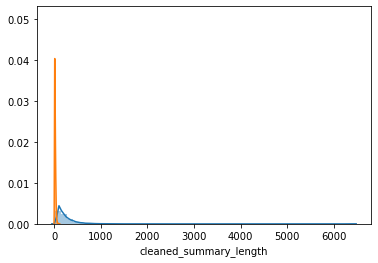

In [8]:
# %%
data.head()


# %%
data["cleaned_text_length"] = data["cleaned_text"].apply(len)
data["cleaned_summary_length"] = data["cleaned_summary"].apply(len)


# %%
sns.distplot(a=data["cleaned_text_length"])
#%%
sns.distplot(a=data["cleaned_summary_length"])

In [9]:
# %%
max_text_len = 80
max_summary_len = 16
#%%
cleaned_text = np.array(data["cleaned_text"])
cleaned_summary = np.array(data["cleaned_summary"])

In [10]:
#%%
short_text = []
short_summary = []
#%%
for i in range(len(cleaned_text)):
    if (
        len(cleaned_summary[i].split()) <= max_summary_len
        and len(cleaned_text[i].split()) <= max_text_len
    ):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])

df = pd.DataFrame({"text": short_text, "summary": short_summary})
#%%
df.head()

,text,summary
0,bought several vitality canned dog food produc...,good quality dog food
1,product arrived labeled jumbo salted peanuts p...,not advertised
2,this confection around centuries light pillowy...,delight says all
3,looking secret ingredient robitussin believe f...,cough medicine
4,great taffy great price there wide assortment ...,great taffy


In [11]:
# %%
df["summary"] = df["summary"].apply(lambda x: "<START> " + x + " <END>")

In [12]:
# !pip install tensorflow==2.0
# !pip install keras==2.3

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_val, y_train, y_val = train_test_split(
    np.array(df["text"]),
    np.array(df["summary"]),
    test_size=0.1,
    random_state=0,
    shuffle=True,
)

In [15]:

# %%
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

#%%
# prepare a tokenizer for reviews on training data

x_tokenizer = Tokenizer(lower=False)
#%%
x_tokenizer.fit_on_texts(X_train)

In [16]:
#%%
thresh = 5

cnt = 0
tot_cnt = 0
freq = 0
tot_freq = 0

for key, value in x_tokenizer.word_counts.items():
    tot_cnt = tot_cnt + 1
    tot_freq = tot_freq + value
    if value < thresh:
        cnt = cnt + 1
        freq = freq + value

In [17]:
#%%
max_text_len = 80
max_summary_len = 16
# %%
# prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer(num_words=tot_cnt - cnt)
x_tokenizer.fit_on_texts(list(X_train))

In [18]:
#%%
# convert text sequences into integer sequences
x_tr_seq = x_tokenizer.texts_to_sequences(X_train)
x_val_seq = x_tokenizer.texts_to_sequences(X_val)

#%%
# padding zero upto maximum length
x_tr = pad_sequences(x_tr_seq, maxlen=max_text_len, padding="post")
x_val = pad_sequences(x_val_seq, maxlen=max_text_len, padding="post")

In [19]:
#%%
# size of vocabulary ( +1 for padding token)
x_voc = x_tokenizer.num_words + 1

# %%
# prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_train))

In [20]:
#%%
thresh = 6

cnt = 0
tot_cnt = 0
freq = 0
tot_freq = 0

for key, value in y_tokenizer.word_counts.items():
    tot_cnt = tot_cnt + 1
    tot_freq = tot_freq + value
    if value < thresh:
        cnt = cnt + 1
        freq = freq + value

In [21]:
#%%
# prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer(num_words=tot_cnt - cnt)
y_tokenizer.fit_on_texts(list(y_train))

#%%
# convert text sequences into integer sequences
y_tr_seq = y_tokenizer.texts_to_sequences(y_train)
y_val_seq = y_tokenizer.texts_to_sequences(y_val)

#%%
# padding zero upto maximum length
y_tr = pad_sequences(y_tr_seq, maxlen=max_summary_len, padding="post")
y_val = pad_sequences(y_val_seq, maxlen=max_summary_len, padding="post")

#%%
# size of vocabulary
y_voc = y_tokenizer.num_words + 1

In [22]:
# %%
# Finding rows with only two words
ind = []
for i in range(len(y_tr)):
    cnt = 0
    for j in y_tr[i]:
        if j != 0:
            cnt = cnt + 1
    if cnt == 2:
        ind.append(i)

#%%
y_tr = np.delete(y_tr, ind, axis=0)
x_tr = np.delete(x_tr, ind, axis=0)

In [23]:
#%%
ind = []
for i in range(len(y_val)):
    cnt = 0
    for j in y_val[i]:
        if j != 0:
            cnt = cnt + 1
    if cnt == 2:
        ind.append(i)

#%%
y_val = np.delete(y_val, ind, axis=0)
x_val = np.delete(x_val, ind, axis=0)

In [24]:
#%%
# Attention class (Can be ignored to understand)
import tensorflow as tf
import os
from tensorflow.python.keras.layers import Layer
from tensorflow.python.keras import backend as K

In [25]:
#%%
class AttentionLayer(Layer):
    """
    This class implements Bahdanau attention (https://arxiv.org/pdf/1409.0473.pdf).
    There are three sets of weights introduced W_a, U_a, and V_a
     """

    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        # Create a trainable weight variable for this layer.

        self.W_a = self.add_weight(
            name="W_a",
            shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
            initializer="uniform",
            trainable=True,
        )
        self.U_a = self.add_weight(
            name="U_a",
            shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
            initializer="uniform",
            trainable=True,
        )
        self.V_a = self.add_weight(
            name="V_a",
            shape=tf.TensorShape((input_shape[0][2], 1)),
            initializer="uniform",
            trainable=True,
        )

        super(AttentionLayer, self).build(
            input_shape
        )  # Be sure to call this at the end

    def call(self, inputs, verbose=False):
        """
        inputs: [encoder_output_sequence, decoder_output_sequence]
        """
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print("encoder_out_seq>", encoder_out_seq.shape)
            print("decoder_out_seq>", decoder_out_seq.shape)

        def energy_step(inputs, states):
            """ Step function for computing energy for a single decoder state """

            assert_msg = "States must be a list. However states {} is of type {}".format(
                states, type(states)
            )
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            """ Some parameters required for shaping tensors"""
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            """ Computing S.Wa where S=[s0, s1, ..., si]"""
            # <= batch_size*en_seq_len, latent_dim
            reshaped_enc_outputs = K.reshape(encoder_out_seq, (-1, en_hidden))
            # <= batch_size*en_seq_len, latent_dim
            W_a_dot_s = K.reshape(
                K.dot(reshaped_enc_outputs, self.W_a), (-1, en_seq_len, en_hidden)
            )
            if verbose:
                print("wa.s>", W_a_dot_s.shape)

            """ Computing hj.Ua """
            U_a_dot_h = K.expand_dims(
                K.dot(inputs, self.U_a), 1
            )  # <= batch_size, 1, latent_dim
            if verbose:
                print("Ua.h>", U_a_dot_h.shape)

            """ tanh(S.Wa + hj.Ua) """
            # <= batch_size*en_seq_len, latent_dim
            reshaped_Ws_plus_Uh = K.tanh(
                K.reshape(W_a_dot_s + U_a_dot_h, (-1, en_hidden))
            )
            if verbose:
                print("Ws+Uh>", reshaped_Ws_plus_Uh.shape)

            """ softmax(va.tanh(S.Wa + hj.Ua)) """
            # <= batch_size, en_seq_len
            e_i = K.reshape(K.dot(reshaped_Ws_plus_Uh, self.V_a), (-1, en_seq_len))
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            if verbose:
                print("ei>", e_i.shape)

            return e_i, [e_i]

        def context_step(inputs, states):
            """ Step function for computing ci using ei """
            # <= batch_size, hidden_size
            c_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print("ci>", c_i.shape)
            return c_i, [c_i]

        def create_inital_state(inputs, hidden_size):
            # We are not using initial states, but need to pass something to K.rnn funciton
            fake_state = K.zeros_like(inputs)  # <= (batch_size, enc_seq_len, latent_dim
            fake_state = K.sum(fake_state, axis=[1, 2])  # <= (batch_size)
            fake_state = K.expand_dims(fake_state)  # <= (batch_size, 1)
            fake_state = K.tile(
                fake_state, [1, hidden_size]
            )  # <= (batch_size, latent_dim
            return fake_state

        fake_state_c = create_inital_state(encoder_out_seq, encoder_out_seq.shape[-1])
        fake_state_e = create_inital_state(
            encoder_out_seq, encoder_out_seq.shape[1]
        )  # <= (batch_size, enc_seq_len, latent_dim

        """ Computing energy outputs """
        # e_outputs => (batch_size, de_seq_len, en_seq_len)
        last_out, e_outputs, _ = K.rnn(energy_step, decoder_out_seq, [fake_state_e],)

        """ Computing context vectors """
        last_out, c_outputs, _ = K.rnn(context_step, e_outputs, [fake_state_c],)

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        """ Outputs produced by the layer """
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1])),
        ]

In [26]:
# %%
from tensorflow.keras.layers import (
    LSTM,
    Bidirectional,
    Embedding,
    Concatenate,
    TimeDistributed,
    Dense,
    Input,
    BatchNormalization
)
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

K.clear_session()

In [27]:
with open("../input/glove6b/glove.6B.100d.txt") as glove:
    embedding_dict = {}
    for x in glove.readlines():
        word_vectors = x.split()
        word = word_vectors[0]
        embedding_dict[word] = np.asarray(word_vectors[1:], dtype="float32")

print("Loaded %s word vectors." % len(embedding_dict))

Loaded 400000 word vectors.


In [28]:
word_index = x_tokenizer.word_index

In [29]:
len(word_index)
x_voc

17240

5396

In [30]:
embedding_matrix = np.zeros((len(word_index)+1, 100))
for word, i in word_index.items():
    embedding_vector = embedding_dict.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [31]:
#%%
latent_dim = 300
embedding_dim = 100

In [32]:
#%%
# Encoder
encoder_inputs = Input(shape=(max_text_len,))

# embedding layer
enc_emb = Embedding(len(word_index)+1, embedding_dim, weights=[embedding_matrix], trainable=False)(encoder_inputs)
enc_emb = BatchNormalization()(enc_emb)

# encoder lstm 1
encoder_lstm1 = LSTM(
    latent_dim,
    return_sequences=True,
    return_state=True,
    dropout=0.4,
    recurrent_dropout=0.4,
)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)
encoder_output1 = BatchNormalization()(encoder_output1)

# encoder lstm 2
encoder_lstm2 = LSTM(
    latent_dim,
    return_sequences=True,
    return_state=True,
    dropout=0.4,
    recurrent_dropout=0.4,
)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)
encoder_output2 = BatchNormalization()(encoder_output2)

# encoder lstm 3
encoder_lstm3 = LSTM(
    latent_dim,
    return_state=True,
    return_sequences=True,
    dropout=0.4,
    recurrent_dropout=0.4,
)
encoder_outputs, state_h, state_c = encoder_lstm3(encoder_output2)

In [33]:
#%%
# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))


# embedding layer
dec_emb_layer = Embedding(len(word_index)+1, embedding_dim, weights=[embedding_matrix], trainable=False)
dec_emb = dec_emb_layer(decoder_inputs)
dec_emb = BatchNormalization()(dec_emb)


decoder_lstm = LSTM(
    latent_dim,
    return_sequences=True,
    return_state=True,
    dropout=0.4,
    recurrent_dropout=0.2,
)
decoder_outputs, decoder_fwd_state, decoder_back_state = decoder_lstm(
    dec_emb, initial_state=[state_h, state_c]
)
decoder_outputs = BatchNormalization()(decoder_outputs)

In [34]:
#%%
# Attention layer
attn_layer = AttentionLayer(name="attention_layer")
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

#%%
# Concat attention input and decoder LSTM output
decoder_concat_input = Concatenate(axis=-1, name="concat_layer")(
    [decoder_outputs, attn_out]
)

# dense layer
decoder_dense = TimeDistributed(Dense(y_voc, activation="softmax"))
decoder_outputs = decoder_dense(decoder_concat_input)

In [35]:
#%%
# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 80)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 80, 100)      1724100     input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 80, 100)      400         embedding[0][0]                  
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 80, 300), (N 481200      batch_normalization[0][0]        
______________________________________________________________________________________________

In [36]:
# %%
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
es = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=5)
modelcheckpoint = ModelCheckpoint(
    "best_model.h5",
    monitor="val_loss",
    verbose=1,
    save_best_only=False,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch",
)

In [109]:
#%%
history = model.fit(
    [x_tr, y_tr[:, :-1]],
    y_tr.reshape(y_tr.shape[0], y_tr.shape[1], 1)[:, 1:],
    epochs=50,
    callbacks=[es, modelcheckpoint],
    batch_size=128,
    validation_data=(
        [x_val, y_val[:, :-1]],
        y_val.reshape(y_val.shape[0], y_val.shape[1], 1)[:, 1:],
    ),
)

Epoch 1/50
92/92 [==============================] - ETA: 0s - loss: 1.3919 - accuracy: 0.7925
Epoch 00001: saving model to best_model.h5
92/92 [==============================] - 104s 1s/step - loss: 1.3919 - accuracy: 0.7925 - val_loss: 2.0954 - val_accuracy: 0.7238
Epoch 2/50
92/92 [==============================] - ETA: 0s - loss: 1.1292 - accuracy: 0.8117
Epoch 00002: saving model to best_model.h5
92/92 [==============================] - 100s 1s/step - loss: 1.1292 - accuracy: 0.8117 - val_loss: 1.3889 - val_accuracy: 0.7901
Epoch 3/50
92/92 [==============================] - ETA: 0s - loss: 1.0489 - accuracy: 0.8154
Epoch 00003: saving model to best_model.h5
92/92 [==============================] - 101s 1s/step - loss: 1.0489 - accuracy: 0.8154 - val_loss: 1.1491 - val_accuracy: 0.8106
Epoch 4/50
92/92 [==============================] - ETA: 0s - loss: 0.9921 - accuracy: 0.8187
Epoch 00004: saving model to best_model.h5
92/92 [==============================] - 102s 1s/step - loss: 

In [44]:
import tensorflow as tf
model = tf.lite.TFLiteConverter.from_keras_model(export_dir='output/kaggle/working/best_model.h5')

TypeError: from_keras_model() got an unexpected keyword argument 'exportdir'

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_text_len,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#attention inference
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat) 

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['start']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='end'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'end'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [ ]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['start']) and i!=target_word_index['end']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [ ]:
for i in range(0,100):
    print("Review:",seq2text(x_tr[i]))
    print("Original summary:",seq2summary(y_tr[i]))
    print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,max_text_len)))
    print("\n")